# Neural Network Using Python and Numpy

In [3]:
from IPython.display import Image
Image(url= "https://www.python-course.eu/images/example_network_3_4_2_without_bias.png", width=500, height=300)

The input layer consists of the nodes i1, i2 and i3.

In [4]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


 We will have to transpose it into a column vector.

In [5]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print(input_vector, input_vector.shape)

[[ 2]
 [ 4]
 [11]] (3, 1)


Initializing the weight matrices

In [11]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


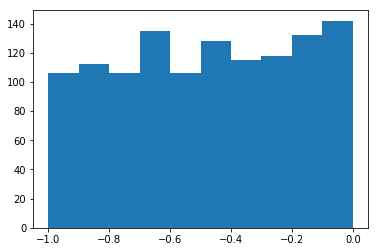

In [12]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

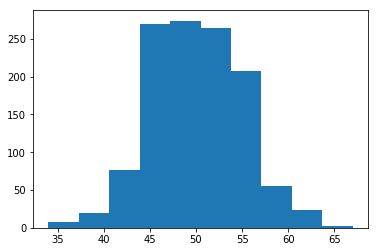

In [13]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

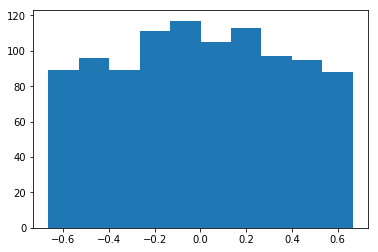

In [14]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

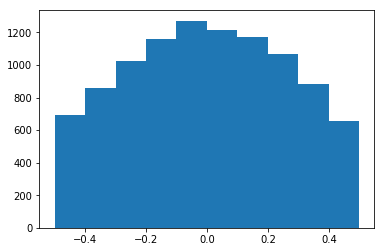

In [16]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

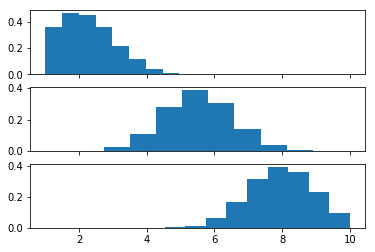

In [17]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), normed=True)
ax[1].hist(X2.rvs(10000), normed=True)
ax[2].hist(X3.rvs(10000), normed=True)
plt.show()

In [18]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.53241318,  0.28916758,  0.5382218 ],
       [-0.32611671,  0.13756235, -0.10231581],
       [-0.39756144,  0.50779894,  0.23187976],
       [-0.13129514,  0.11078677, -0.00253108]])

In [19]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.20028956,  0.49781726,  0.33728424,  0.19429022],
       [ 0.35675757, -0.47176965,  0.46996746,  0.35908983]])

A Neural Network Class

In [20]:
import numpy as np
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
             
    
    def train(self):
        pass
    
    def run(self):
        pass
    
    
if __name__ == "__main__":
    simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                                   no_of_out_nodes = 2, 
                                   no_of_hidden_nodes = 4,
                                   learning_rate = 0.1)
    print(simple_network.weights_in_hidden)
    print(simple_network.weights_hidden_out)

[[ 0.41361941 -0.24181436 -0.2166019 ]
 [-0.38271891 -0.5224471   0.29569382]
 [ 0.05279485 -0.22298383 -0.16442593]
 [-0.45722635 -0.10462988 -0.53501916]]
[[-0.22682416  0.46516807  0.11172461  0.07434553]
 [-0.17568258  0.44361579 -0.10522482 -0.05737291]]


Activation Functions, Sigmoid and ReLU

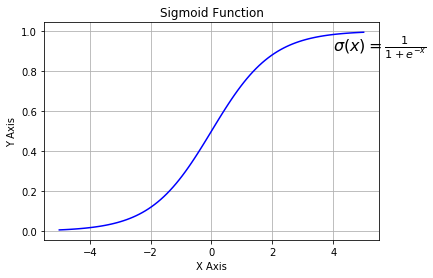

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(4, 0.9, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

In [32]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.967704535302
0.967704535302
[ 0.95257413  0.98201379  0.73105858]
[ 0.68997448  0.90887704  0.99966465]


Adding a run Method

In [33]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector input_vector. 
        input_vector can be tuple, list or ndarray
        """
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [34]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.6)
simple_network.run([(3, 4)])

array([[ 0.51382555],
       [ 0.53539667]])